In [115]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import math

In [116]:
def rechnung(daten):
    numbers = np.array([float(x[1].replace(',', '.')) for x in daten])
    durchschnitt = np.mean(numbers)
    standardabweichung = np.std(numbers)
    return (durchschnitt, standardabweichung)

In [117]:
csv_dateien = glob.glob(f"{'./entfernung/'}/*.csv")

durchschnitt = []
standardabweichung = []

for datei_name in csv_dateien:
    data = np.genfromtxt(datei_name, skip_header=1000,dtype=str, delimiter=';')
    ergebnis = rechnung(data)
    durchschnitt.append(ergebnis[0])
    standardabweichung.append(ergebnis[1])


durchschnitt_log = [math.log(x) for x in durchschnitt]
print(durchschnitt)
standardabweichung_log = [math.log(x) for x in standardabweichung]
print(standardabweichung)

[1.3946131145006881, 1.2436764882567437, 1.112141969861603, 1.0130652936497093, 0.9372022760364012, 0.8800206947825265, 0.8394404013881736, 0.761258541601076, 0.7453666655215896, 0.6866838854362606, 0.6484202273420834, 0.6470230322075219, 0.6098122271823542, 0.589205215544183, 0.5890413208299619, 0.5671978634356513, 0.5506348159477097, 0.5124518042832672, 0.5121231692006178, 0.5098445975672806, 0.48532511048959137]
[0.019148047813423927, 0.023835453003513776, 0.02144001663005375, 0.023403827673543893, 0.019936793215626337, 0.020725779080344404, 0.020494058789232987, 0.022925361008575132, 0.019788008694651405, 0.023320479473020995, 0.02001781224236545, 0.020254909086743957, 0.018954582668169708, 0.02410981213575408, 0.023937670546094938, 0.020234217927372743, 0.021484753979330133, 0.017664975358230105, 0.01908252862120939, 0.021002353561452143, 0.024150613467069832]


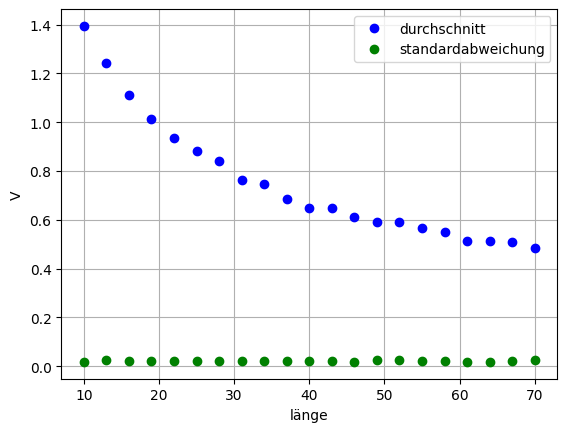

In [118]:
l = [l for l in range(10, 73, 3)]
plt.plot(l, durchschnitt,'bo', label='durchschnitt')
plt.plot(l, standardabweichung,'go', label='standardabweichung')
plt.legend()

plt.xlabel('länge')
plt.ylabel('V')
plt.grid(True)
plt.show()

In [119]:
def linreg2(l, durchschnitt):
    l_mean = np.mean(l)
    durchschnitt_mean = np.mean(durchschnitt)
    oben = 0
    unten = 0
    for index in range(len(l)):
        oben += (l[index] - l_mean) * (durchschnitt[index] - durchschnitt_mean)
        unten += (l[index] - l_mean)**2
    a = oben / unten
    b = durchschnitt_mean - a * l_mean
    return (a, b)



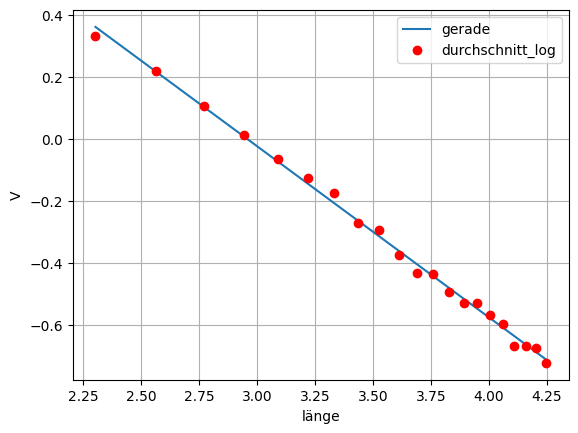

In [128]:
l_log = [math.log(x) for x in l]
a, b = linreg2(l_log, durchschnitt_log)

x = np.linspace(min(l_log), max(l_log), 1000)
y = a * x + b

plt.plot(x, y, label='gerade')
plt.plot(l_log, durchschnitt_log, 'ro', label='durchschnitt_log')
plt.legend()

plt.xlabel('länge')
plt.ylabel('V')
plt.grid(True)
plt.show()

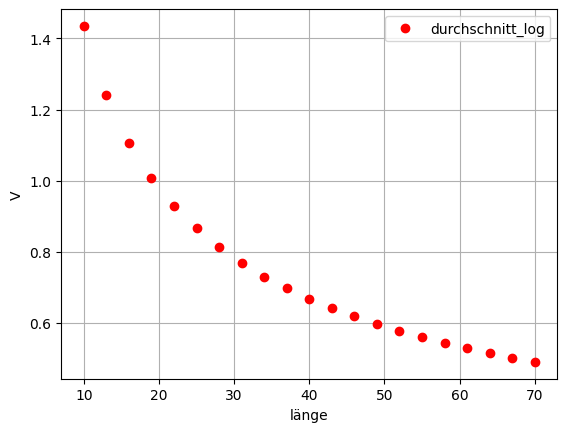

In [125]:
y = math.e ** b * l ** a

plt.plot(l, y, 'ro', label='durchschnitt_log')
plt.legend()

plt.xlabel('länge')
plt.ylabel('V')
plt.grid(True)
plt.show()